In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
#%matplotlib notebook

In [17]:
nSample = 100
nDup = 5
runtime = np.zeros((8, nSample))
for K in range(3, 11):
    fname = 'algo2_output/with_path_3_thread/valK{}.csv'.format(K)
    runtime_K = np.genfromtxt(fname, delimiter=',')
    runtime[K-3] = np.mean(runtime_K[:nSample], axis=1)

mean = np.mean(runtime, axis=1)
Max = np.max(runtime, axis=1)-mean
Min = mean - np.min(runtime, axis=1)
print(mean)
print(Max)
print(Min)
err = np.zeros((2, len(Max)))
err[0] = Min
err[1] = Max
print(err)

[  163.21    243.524   294.      834.178  1504.456  5813.48   7748.938
 38842.7  ]
[9.20590000e+02 3.14987600e+03 3.12720000e+03 4.98424220e+04
 5.17919440e+04 4.67179720e+05 5.42721862e+05 1.44034350e+06]
[   76.01    154.524   192.      710.578  1346.456  5580.68   7369.338
 38180.3  ]
[[7.60100000e+01 1.54524000e+02 1.92000000e+02 7.10578000e+02
  1.34645600e+03 5.58068000e+03 7.36933800e+03 3.81803000e+04]
 [9.20590000e+02 3.14987600e+03 3.12720000e+03 4.98424220e+04
  5.17919440e+04 4.67179720e+05 5.42721862e+05 1.44034350e+06]]


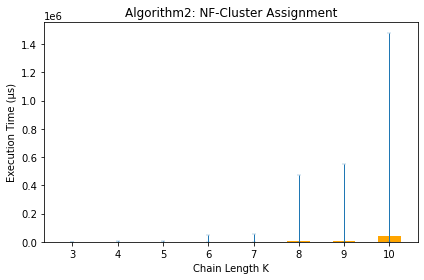

In [19]:
plt.bar(range(3,11), mean, width=0.5, color='orange')
plt.errorbar(range(3,11), mean, yerr=err, fmt='none', capsize=2, capthick=0.3, elinewidth=1)
plt.ylabel('Execution Time (µs)')
plt.xlabel('Chain Length K')
plt.title('Algorithm2: NF-Cluster Assignment')
plt.tight_layout()
#plt.savefig('algo2_3_100_path'+str(nSample)+'.png', dpi=1000)

In [13]:
nSample = 1
nDup = 5
runtime = np.zeros((8, nDup))
for K in range(3, 11):
    fname = 'algo2_output/with_path_min_thread/valK{}.csv'.format(K)
    runtime_K = np.genfromtxt(fname, delimiter=',')
    runtime[K-3] = runtime_K

mean = np.mean(runtime, axis=1)
Max = np.max(runtime, axis=1)-mean
Min = mean - np.min(runtime, axis=1)
print(mean)
print(Max)
print(Min)
err = np.zeros((2, len(Max)))
err[0] = Min
err[1] = Max
print(err)

[170.8 132.8 132.4 135.4 180.8 242.6 403.  707.6]
[29.2 69.2 58.6 50.6 53.2 60.4 49.  76.4]
[19.8 51.8 35.4 32.4 45.8 37.6 44.  50.6]
[[19.8 51.8 35.4 32.4 45.8 37.6 44.  50.6]
 [29.2 69.2 58.6 50.6 53.2 60.4 49.  76.4]]


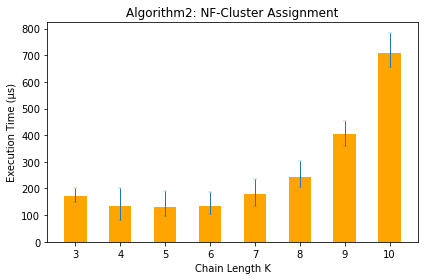

In [16]:
plt.bar(range(3,11), mean, width=0.5, color='orange')
plt.errorbar(range(3,11), mean, yerr=err, fmt='none', capsize=2, capthick=0.3, elinewidth=1)
plt.ylabel('Execution Time (µs)')
plt.xlabel('Chain Length K')
plt.title('Algorithm2: NF-Cluster Assignment')
plt.tight_layout()
plt.savefig('algo2_path_min_thread.png', dpi=1000)

In [11]:
pow(10/9, 10/2)*10

16.935087808430293

In [9]:
5629534/283376

19.865951950765062

In [146]:
nSample = 1000
nNewSample = 200
nDup = 20
distr = ['homogeneous1000', 'bias1000']
meanAll = np.zeros((len(distr), 8))
maxAll = np.zeros((len(distr), 8))
errAll = np.zeros((len(distr), 2, 8))

for i in range(len(distr)):
    runtime = np.zeros((8, nNewSample))
    
    for K in range(3, 11):
        fname = 'algo2_output/'+distr[i]+'/valK{}.csv'.format(K)
        runtime_K = np.genfromtxt(fname, delimiter=',')
        
        # Resample Begin
        
        runtime_K=runtime_K[np.random.randint(nSample, size=nNewSample)]
        nSample = nNewSample
        
        # End
        
        runtime[K-3] = np.mean(runtime_K[:nSample], axis=1)

    mean = np.mean(runtime, axis=1)
    Max = np.max(runtime, axis=1)-mean
    print("max loc")
    print(np.argmax(runtime, axis=1))
    Min = mean - np.min(runtime, axis=1)
    print(mean)
    err = np.zeros((2, len(Max)))
    err[0] = Min
    err[1] = Max
    print(err)
    meanAll[i] = mean
    errAll[i] = err
    maxAll[i] = np.max(runtime, axis=1)

max loc
[ 67  47 110  44  71 196  82  86]
[1.55082500e+01 4.29260000e+01 1.48836000e+02 3.96280000e+02
 1.27987550e+03 4.55234375e+03 1.26346915e+04 5.42309950e+04]
[[9.10825000e+00 3.18260000e+01 1.28686000e+02 3.53280000e+02
  1.19697550e+03 4.28004375e+03 1.21747915e+04 5.26104450e+04]
 [9.53917500e+01 1.24074000e+02 2.62714000e+02 1.04662000e+03
  4.33257450e+03 1.51927562e+04 6.49289085e+04 2.63328155e+05]]
max loc
[ 75  38 117 186 144  64  82  41]
[1.2212750e+01 3.0944500e+01 9.5104000e+01 2.2226950e+02 7.0311750e+02
 1.7787160e+03 6.7874385e+03 1.7719310e+04]
[[5.86275000e+00 1.97945000e+01 7.51040000e+01 1.84969500e+02
  6.19767500e+02 1.61306600e+03 6.46788850e+03 1.70825600e+04]
 [7.99372500e+01 1.09605500e+02 3.14146000e+02 1.40693050e+03
  4.81518250e+03 1.78344340e+04 7.47005115e+04 2.82467040e+05]]


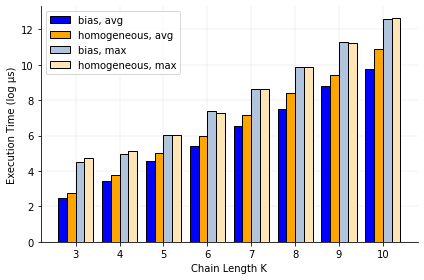

In [148]:
w=0.2
#plt.bar(np.arange(3,11)-w, meanAll[2], width=w, color='red', label='1/x^'+str(distr[2]))
#plt.errorbar(np.arange(3,11)-w, meanAll[2], yerr=errAll[2], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')

plt.bar(np.arange(3,11)-1.5*w, np.log(meanAll[1]), width=w, color='blue', label='bias, avg', edgecolor='black')
plt.bar(np.arange(3,11)-0.5*w, np.log(meanAll[0]), width=w, color='orange', label='homogeneous, avg', edgecolor='black')
#plt.errorbar(np.arange(3,11)+w, meanAll[0], yerr=errAll[0], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')

plt.bar(np.arange(3,11)+0.5*w, np.log(maxAll[1]), width=w, color='lightsteelblue', label='bias, max', edgecolor='black')
plt.bar(np.arange(3,11)+1.5*w, np.log(maxAll[0]), width=w, color='moccasin', label='homogeneous, max', edgecolor='black')
#plt.errorbar(np.arange(3,11), meanAll[1], yerr=errAll[1], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')



plt.ylabel('Execution Time (log µs)')
plt.xlabel('Chain Length K')
plt.legend()
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.rcParams['axes.axisbelow'] = True
#plt.title('Algorithm2: NF-Cluster Assignment')
plt.tight_layout()
plt.savefig('algo2_resample_200.png', dpi=1000)

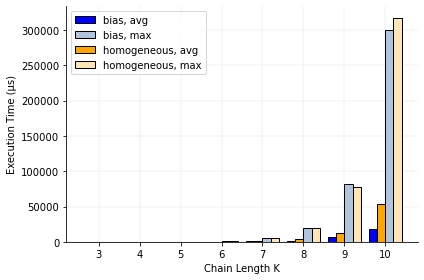

In [157]:
w=0.2
#plt.bar(np.arange(3,11)-w, meanAll[2], width=w, color='red', label='1/x^'+str(distr[2]))
#plt.errorbar(np.arange(3,11)-w, meanAll[2], yerr=errAll[2], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')

plt.bar(np.arange(3,11)-1.5*w, meanAll[1], width=w, color='blue', label='bias, avg', edgecolor='black')
plt.bar(np.arange(3,11)+0.5*w, maxAll[1], width=w, color='lightsteelblue', label='bias, max', edgecolor='black')
#plt.errorbar(np.arange(3,11)+w, meanAll[0], yerr=errAll[0], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')

plt.bar(np.arange(3,11)-0.5*w, meanAll[0], width=w, color='orange', label='homogeneous, avg', edgecolor='black')
plt.bar(np.arange(3,11)+1.5*w, maxAll[0], width=w, color='moccasin', label='homogeneous, max', edgecolor='black')
#plt.errorbar(np.arange(3,11), meanAll[1], yerr=errAll[1], fmt='none', capsize=2, capthick=0.3, elinewidth=1, color='gray')



plt.ylabel('Execution Time (µs)')
plt.xlabel('Chain Length K')
plt.legend()
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.rcParams['axes.axisbelow'] = True
#plt.title('Algorithm2: NF-Cluster Assignment')
plt.tight_layout()
plt.savefig('algo2_resample_200_nolog.png', dpi=1000)

In [156]:
from scipy.io import savemat
mdic = {"algo2_bias_avg": meanAll[1], 
        "algo2_homo_avg": meanAll[0], 
        "algo2_bias_max": maxAll[1],
        "algo2_homo_max": maxAll[0]}
savemat("ppc_algo2_runtime_nolog.mat", mdic)